In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


In [3]:
df=pd.read_csv('monster_com-job_sample.csv')
df.head()

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c


In [12]:
print(f"Shape of data : {df.shape}")
print(f"---Data info---")
df.info()
print(f"---Missing values---")
print(df.isnull().sum())

Shape of data : (22000, 14)
---Data info---
<class 'pandas.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   country          22000 non-null  str  
 1   country_code     22000 non-null  str  
 2   date_added       122 non-null    str  
 3   has_expired      22000 non-null  str  
 4   job_board        22000 non-null  str  
 5   job_description  22000 non-null  str  
 6   job_title        22000 non-null  str  
 7   job_type         20372 non-null  str  
 8   location         22000 non-null  str  
 9   organization     15133 non-null  str  
 10  page_url         22000 non-null  str  
 11  salary           3446 non-null   str  
 12  sector           16806 non-null  str  
 13  uniq_id          22000 non-null  str  
dtypes: str(14)
memory usage: 2.3 MB
---Missing values---
country                0
country_code           0
date_added         21878
has_expired          

In [13]:
print(f"---Unique values---")
print(df.nunique())

---Unique values---
country                1
country_code           1
date_added            78
has_expired            1
job_board              1
job_description    18744
job_title          18759
job_type              39
location            8423
organization         738
page_url           22000
salary              1737
sector               163
uniq_id            22000
dtype: int64


In [4]:
# Droping columns that are not useful for analysis
df = df.drop(columns=['country', 'country_code', 'has_expired', 'job_board', 'page_url', 'uniq_id'])
df.describe()

,date_added,job_description,job_title,job_type,location,organization,salary,sector
count,122,22000,22000,20372,22000,15133,3446,16806
unique,78,18744,18759,39,8423,738,1737,163
top,9/22/2016,12N Horizontal Construction Engineers Job Desc...,Monster,Full Time,"Dallas, TX",Healthcare Services,"40,000.00 - 100,000.00 $ /year",Experienced (Non-Manager)
freq,6,104,318,6757,646,1919,50,4594


In [29]:
print("Samples of salary column:")
print(df['salary'].dropna().head(20))

Samples of salary column:
13                                 9.00 - 13.00 $ /hour
14                        80,000.00 - 95,000.00 $ /year
19                        60,000.00 - 72,000.00 $ /year
23                         Excellent Pay and Incentives
29                       70,000.00 - 100,000.00 $ /year
30                                62.00 - 81.00 $ /hour
32                       75,000.00 - 100,000.00 $ /year
36                        68,000.00 - 72,000.00 $ /year
41                        58,000.00 - 65,000.00 $ /year
42                                      Up to $32000.00
43                                15.00 - 16.00 $ /hour
58                              Salary, plus commission
61    45,000.00 - 100,000.00 $ /yearBonus, Benefits,...
64                  40,000.00 - 50,000.00 $ /yearsalary
68                  13.75 - 16.75 $ /hourYear End Bonus
70                                     To be discussed.
80                                40.00 - 50.00 $ /hour
82                    

In [ ]:
#splitting salary column into min and max salary
salary_split = df['salary'].str.split('-', expand=True)

def clean_salary(col):
    return col.str.replace(r'[$,/year/hour ]', '', regex=True).str.replace(',', '')

df['min_salary'] = clean_salary(salary_split[0])
df['max_salary'] = clean_salary(salary_split[1])

df['min_salary'] = pd.to_numeric(df['min_salary'], errors='coerce')
df['max_salary'] = pd.to_numeric(df['max_salary'], errors='coerce')

df[['salary', 'min_salary', 'max_salary']].head(10)

,salary,min_salary,max_salary
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [ ]:
df[df['salary'].notnull()][['salary', 'min_salary', 'max_salary']].head(10)

,salary,min_salary,max_salary
13,9.00 - 13.00 $ /hour,9.0,13.0
14,"80,000.00 - 95,000.00 $ /year",80000.0,95000.0
19,"60,000.00 - 72,000.00 $ /year",60000.0,72000.0
23,Excellent Pay and Incentives,NaN,NaN
29,"70,000.00 - 100,000.00 $ /year",70000.0,100000.0
30,62.00 - 81.00 $ /hour,62.0,81.0
32,"75,000.00 - 100,000.00 $ /year",75000.0,100000.0
36,"68,000.00 - 72,000.00 $ /year",68000.0,72000.0
41,"58,000.00 - 65,000.00 $ /year",58000.0,65000.0
42,Up to $32000.00,NaN,NaN


In [9]:
df['is_hourly'] = df['salary'].str.contains('hour', case=False, na=False)

df['min_salary_annual'] = np.where(df['is_hourly'], df['min_salary'] * 2080, df['min_salary'])
df['max_salary_annual'] = np.where(df['is_hourly'], df['max_salary'] * 2080, df['max_salary'])

df[df['salary'].notnull()][['salary', 'min_salary_annual', 'max_salary_annual']].head(10)

,salary,min_salary_annual,max_salary_annual
13,9.00 - 13.00 $ /hour,18720.0,27040.0
14,"80,000.00 - 95,000.00 $ /year",80000.0,95000.0
19,"60,000.00 - 72,000.00 $ /year",60000.0,72000.0
23,Excellent Pay and Incentives,NaN,NaN
29,"70,000.00 - 100,000.00 $ /year",70000.0,100000.0
30,62.00 - 81.00 $ /hour,128960.0,168480.0
32,"75,000.00 - 100,000.00 $ /year",75000.0,100000.0
36,"68,000.00 - 72,000.00 $ /year",68000.0,72000.0
41,"58,000.00 - 65,000.00 $ /year",58000.0,65000.0
42,Up to $32000.00,NaN,NaN


In [10]:
location_split = df['location'].str.split(',', n=1 , expand=True)
df['city'] = location_split[0].str.strip()
df['state'] = location_split[1].str.strip()

df[['location', 'city', 'state']].head(10)

,location,city,state
0,"Madison, WI 53702",Madison,WI 53702
1,"Madison, WI 53708",Madison,WI 53708
2,DePuy Synthes Companies is a member of Johnson...,DePuy Synthes Companies is a member of Johnson...,and is recruiting for a Senior Training Leader...
3,"Dixon, CA",Dixon,CA
4,"Camphill, PA",Camphill,PA
5,"Charlottesville, VA",Charlottesville,VA
6,Contact name Tony Zerio,Contact name Tony Zerio,NaN
7,"Austin, TX 73301",Austin,TX 73301
8,"Austin, TX 78746",Austin,TX 78746
9,"Chesterfield, MO",Chesterfield,MO


In [20]:
#droping the original salary and location columns as we have extracted the necessary information
cols_to_drop = ['salary', 'location', 'is_hourly', 'min_salary', 'max_salary', 'date_added']
df_final = df.drop(columns=cols_to_drop)
df_final.head()

,job_description,job_title,job_type,organization,sector,min_salary_annual,max_salary_annual,city,state
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,NaN,IT/Software Development,NaN,NaN,Madison,WI 53702
1,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,Printing and Publishing,NaN,NaN,NaN,Madison,WI 53708
2,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",Personal and Household Services,NaN,NaN,NaN,DePuy Synthes Companies is a member of Johnson...,and is recruiting for a Senior Training Leader...
3,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,Altec Industries,Experienced (Non-Manager),NaN,NaN,Dixon,CA
4,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,Retail,Project/Program Management,NaN,NaN,Camphill,PA


In [21]:
text_cols = ['job_type', 'organization', 'sector', 'state']
df_final[text_cols] = df_final[text_cols].fillna('Not Specified')

df_final = df_final.dropna(subset=['job_title', 'job_description'], how='all')

df_final.info()

<class 'pandas.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_description    22000 non-null  str    
 1   job_title          22000 non-null  str    
 2   job_type           22000 non-null  str    
 3   organization       22000 non-null  str    
 4   sector             22000 non-null  str    
 5   min_salary_annual  2753 non-null   float64
 6   max_salary_annual  2369 non-null   float64
 7   city               22000 non-null  str    
 8   state              22000 non-null  str    
dtypes: float64(2), str(7)
memory usage: 1.5 MB


In [51]:
df_final['job_type'] = df_final['job_type'].str.lower()

df_final.loc[df_final['job_type'].str.contains('full', na=False), 'job_type'] = 'Full Time'

df_final.loc[df_final['job_type'].str.contains('part', na=False), 'job_type'] = 'Part Time'

valid_types = ['Full Time', 'Part Time']
df_final.loc[~df_final['job_type'].isin(valid_types), 'job_type'] = 'Not Specified'

print(df_final['job_type'].value_counts())

job_type
Full Time        18970
Not Specified     2037
Part Time          993
Name: count, dtype: int64


In [27]:
import re

def clean_text(text):
    if not isinstance(text, str): return text
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s.,]', '', text)
    text = " ".join(text.split())
    return text

df_final['job_description'] = df_final['job_description'].apply(clean_text)
df_final['job_title'] = df_final['job_title'].apply(clean_text)

In [52]:
df_final['state'] = df_final['state'].apply(lambda x: x if len(str(x)) <= 15 else 'Not Specified')

df_final.head(10)

,job_description,job_title,job_type,organization,sector,min_salary_annual,max_salary_annual,city,state
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time,Not Specified,IT/Software Development,NaN,NaN,Madison,WI 53702
1,The Wisconsin State Journal is seeking a flexi...,Business ReporterEditor Job in Madison,Full Time,Printing and Publishing,Not Specified,NaN,NaN,Madison,WI 53708
2,Report this job About the Job DePuy Synthes Co...,Johnson Johnson Family of Companies Job Applic...,Full Time,Personal and Household Services,Not Specified,NaN,NaN,DePuy Synthes Companies is a member of Johnson...,Not Specified
3,Why Join Altec If youre considering a career w...,Engineer Quality Job in Dixon,Full Time,Altec Industries,Experienced (Non-Manager),NaN,NaN,Dixon,CA
4,Position ID 76162 Positions 1 State CT City Fa...,Shift Supervisor PartTime Job in Camphill,Full Time,Retail,Project/Program Management,NaN,NaN,Camphill,PA
5,Job Description Job 720298Apex Systems has an ...,Construction PM Charlottesville Job in Charlot...,Full Time,Computer/IT Services,Experienced (Non-Manager),NaN,NaN,Charlottesville,VA
6,Report this job About the Job Based in San Fra...,CyberCoders Job Application for Principal QA E...,Full Time,Computer Software,Not Specified,NaN,NaN,Contact name Tony Zerio,Not Specified
7,RESPONSIBILITIESKforce has a client seeking a ...,Mailroom Clerk Job in Austin,Full Time,Not Specified,Experienced (Non-Manager),NaN,NaN,Austin,TX 73301
8,"PartTime, 430 pm 930 pm, Mon Fri Brookdale Wes...",Housekeeper Job in Austin,Part Time,Hotels and Lodging Personal and Household Serv...,Customer Support/Client Care,NaN,NaN,Austin,TX 78746
9,"Insituform Technologies, LLC, an Aegion compan...",Video Data Management Transportation Technicia...,Not Specified,Not Specified,Not Specified,NaN,NaN,Chesterfield,MO


In [59]:
#saving the cleaned data to a new csv file
df_final.to_csv('monster_jobs_cleaned.csv', index=False)

In [60]:
#saving data to a sqlite database
conn = sqlite3.connect('monster_jobs.db')
df_final.to_sql('cleaned_jobs', conn, if_exists='replace', index=False)
conn.close()

df_final.head()

,job_description,job_title,job_type,organization,sector,min_salary_annual,max_salary_annual,city,state
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time,Not Specified,IT/Software Development,NaN,NaN,Madison,WI 53702
1,The Wisconsin State Journal is seeking a flexi...,Business ReporterEditor Job in Madison,Full Time,Printing and Publishing,Not Specified,NaN,NaN,Madison,WI 53708
2,Report this job About the Job DePuy Synthes Co...,Johnson Johnson Family of Companies Job Applic...,Full Time,Personal and Household Services,Not Specified,NaN,NaN,DePuy Synthes Companies is a member of Johnson...,Not Specified
3,Why Join Altec If youre considering a career w...,Engineer Quality Job in Dixon,Full Time,Altec Industries,Experienced (Non-Manager),NaN,NaN,Dixon,CA
4,Position ID 76162 Positions 1 State CT City Fa...,Shift Supervisor PartTime Job in Camphill,Full Time,Retail,Project/Program Management,NaN,NaN,Camphill,PA


In [50]:
df_final.info()

<class 'pandas.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_description    22000 non-null  str    
 1   job_title          22000 non-null  str    
 2   job_type           22000 non-null  str    
 3   organization       22000 non-null  str    
 4   sector             22000 non-null  str    
 5   min_salary_annual  2753 non-null   float64
 6   max_salary_annual  2369 non-null   float64
 7   city               22000 non-null  str    
 8   state              22000 non-null  str    
dtypes: float64(2), str(7)
memory usage: 1.5 MB


In [58]:
#Sample of data
df_sample = df_final.head(500)
df_sample.to_csv('monster_jobs_sample_cleaned.csv', index=False)

In [35]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

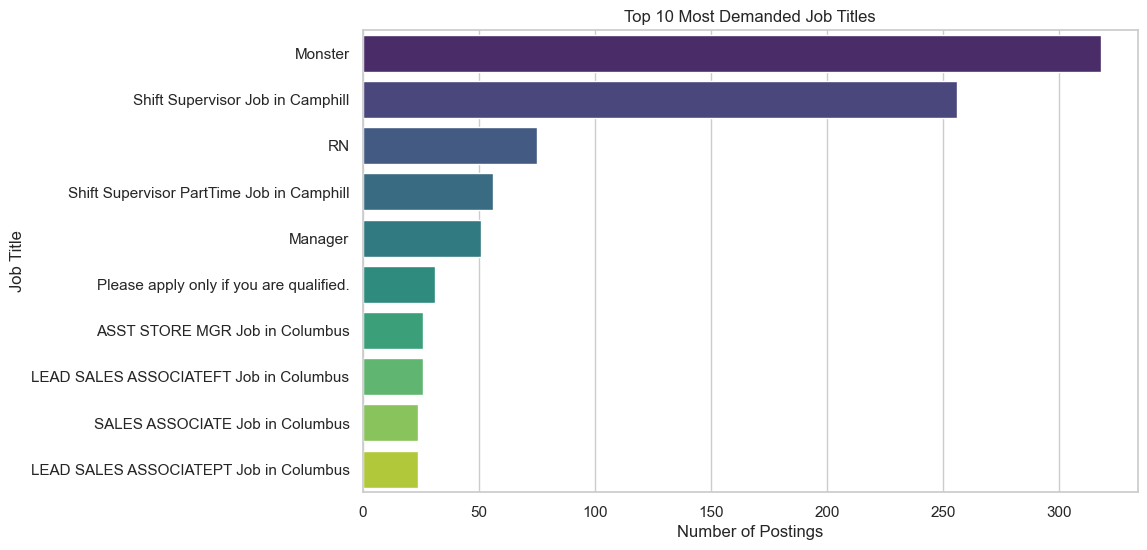

In [37]:
#top 10 most demanded job titles
top_jobs = df_final['job_title'].value_counts().head(10)

sns.barplot(x=top_jobs.values, y=top_jobs.index,hue=top_jobs.index, palette='viridis')
plt.title('Top 10 Most Demanded Job Titles')
plt.xlabel('Number of Postings')
plt.ylabel('Job Title')
plt.show()

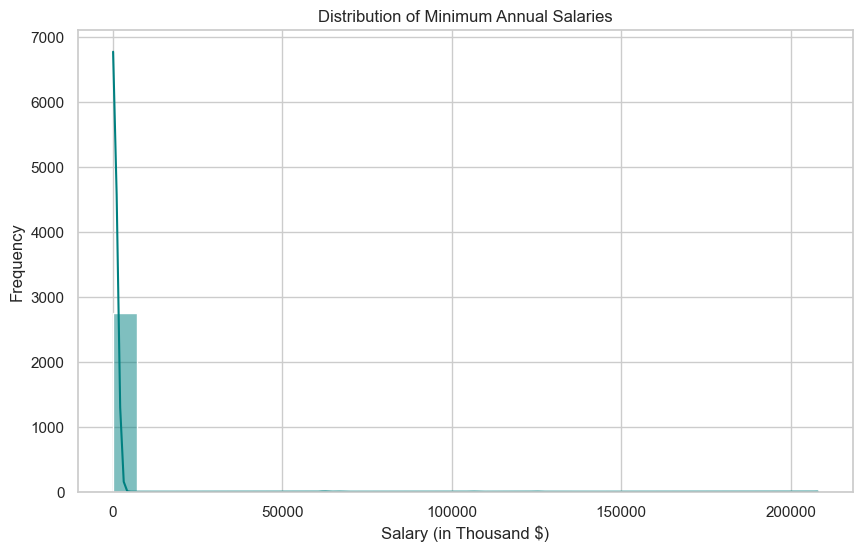

In [54]:
#Salary Distribution
salary_data = df_final['min_salary_annual'].dropna()

sns.histplot(salary_data / 1000, bins=30, kde=True, color='teal')
plt.title('Distribution of Minimum Annual Salaries')
plt.xlabel('Salary (in Thousand $)')
plt.ylabel('Frequency')
plt.show()

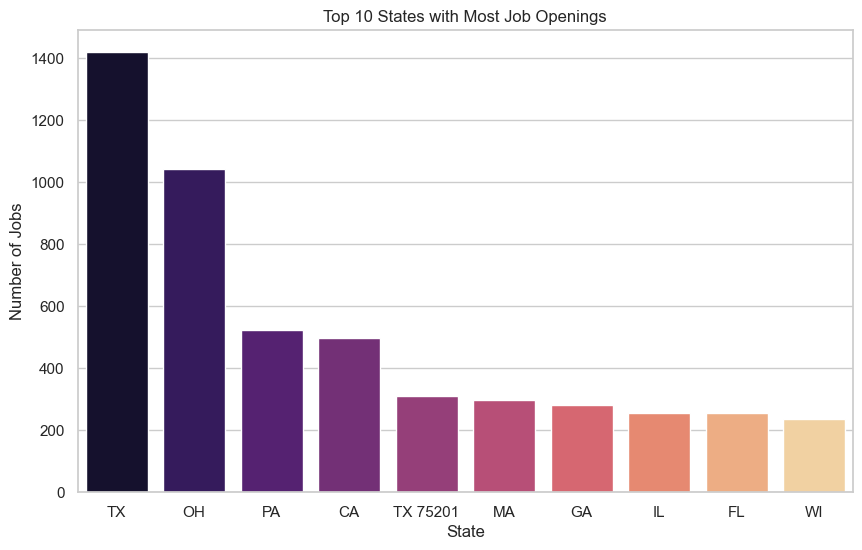

In [43]:
#Jobs by State
state_jobs = df_final[df_final['state'] != 'Not Specified']['state'].value_counts().head(10)

sns.barplot(x=state_jobs.index, y=state_jobs.values,hue=state_jobs.index, palette='magma')
plt.title('Top 10 States with Most Job Openings')
plt.xlabel('State')
plt.ylabel('Number of Jobs')
plt.show()